<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/Social_media_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [12]:
# Loading dataset
data = pd.read_csv('social_media_behavior_dataset.csv')

In [13]:
# 1. Inspecting the data
data.head()

,Date,Platform,Hashtag,Post Content,Sentiment,Likes,Shares
0,2024-02-12,Twitter,#CloudComputing,Can anyone recommend good resources for #Cloud...,Positive,254,28
1,2024-09-17,Instagram,#AI,Not sure I understand #AI. Can someone explain?,Positive,466,51
2,2024-02-28,Twitter,#AI,Not sure I understand #AI. Can someone explain?,Negative,169,61
3,2024-05-29,Twitter,#Python,Can anyone recommend good resources for #Python?,Positive,89,140
4,2024-01-14,Twitter,#CloudComputing,Not sure I understand #CloudComputing. Can som...,Positive,191,191


In [14]:
# 2. Pre-processing Data
# Handling missing values (if any)
data.dropna(subset=['Likes', 'Shares'], inplace=True)

In [15]:
# Converting Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
# Feature Engineering: Creating additional features based on Date
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


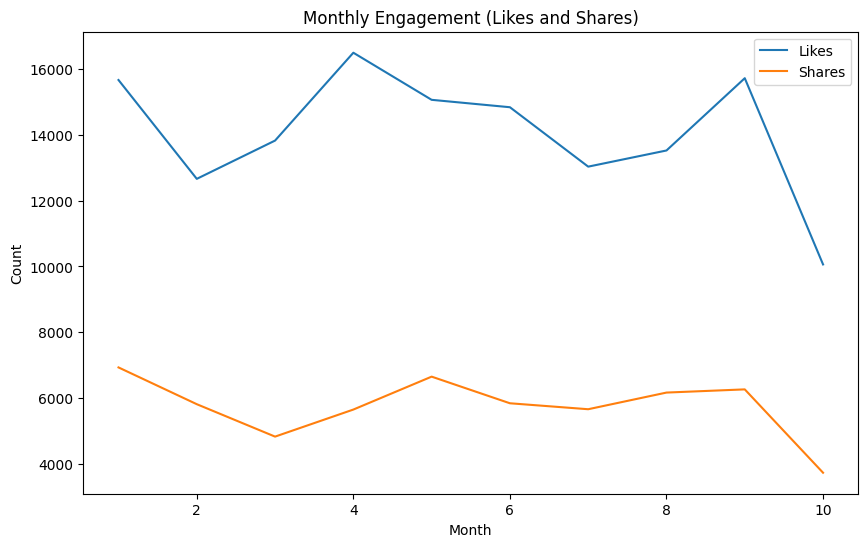

In [17]:
# Visualizing trends over time: Line chart for monthly engagement
monthly_engagement = data.groupby('Month')[['Likes', 'Shares']].sum()
monthly_engagement.plot(kind='line', figsize=(10,6))
plt.title('Monthly Engagement (Likes and Shares)')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()


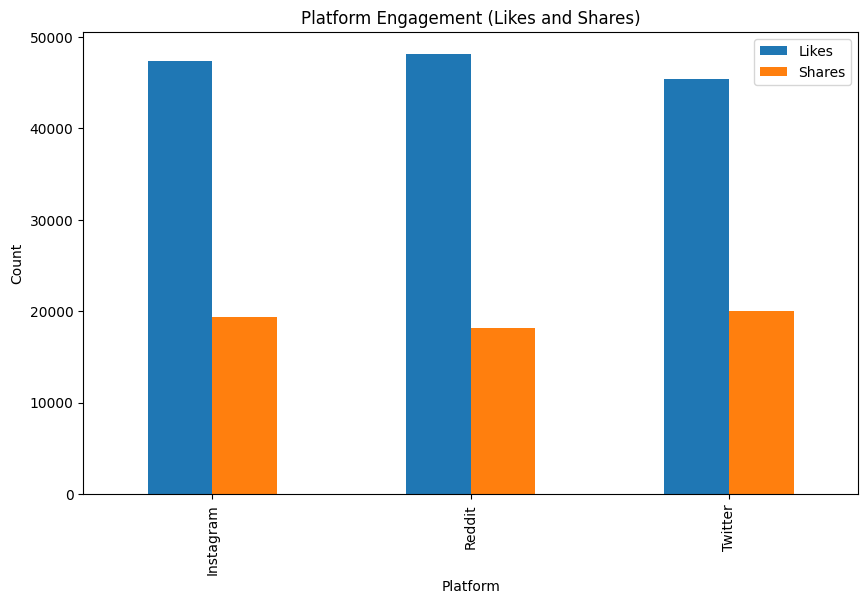

In [18]:
# Visualizing platform engagement
platform_engagement = data.groupby('Platform')[['Likes', 'Shares']].sum()
platform_engagement.plot(kind='bar', figsize=(10,6))
plt.title('Platform Engagement (Likes and Shares)')
plt.ylabel('Count')
plt.xlabel('Platform')
plt.show()


In [19]:
# 3. Specifying the Scope of the Problem: Clustering approach
engagement_data = data[['Likes', 'Shares']]


In [20]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(engagement_data)


In [21]:
# 4. Applying Algorithms: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
data['KMeans_Cluster'] = kmeans.labels_


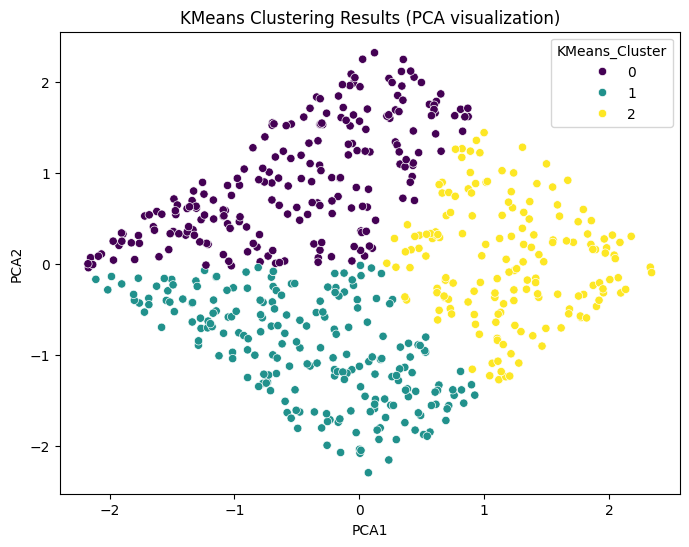

In [22]:
# 4.1 PCA for visualizing KMeans clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('KMeans Clustering Results (PCA visualization)')
plt.show()

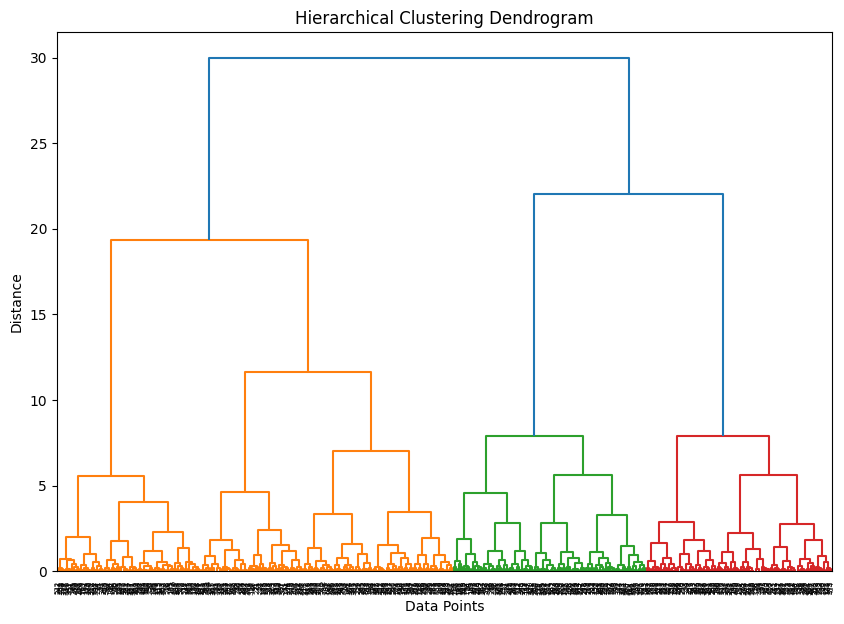

In [23]:
# 4.2 Hierarchical Clustering
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [24]:
# 5. Evaluating the models
# KMeans evaluation using silhouette score
silhouette_kmeans = silhouette_score(scaled_data, kmeans.labels_)
print(f'KMeans Silhouette Score: {silhouette_kmeans}')

KMeans Silhouette Score: 0.3647602037000186
